In [1]:
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from IPython.core.display import clear_output, display

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
module_path = os.path.abspath(os.path.join('../..'))

In [4]:
from ariadne.parsing import parse_df
import ariadne.transformations  as trn

/zfs/hybrilit.jinr.ru/user/n/nuvard/miniconda3/envs/ariadne_cpu/lib/python3.8/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [5]:
from prepare import parse

In [6]:
!ls ../lightning_logs/TrackNETv2

last	    version_15	version_22  version_3	version_37  version_6
version_0   version_16	version_23  version_30	version_38  version_7
version_1   version_17	version_24  version_31	version_39  version_8
version_10  version_18	version_25  version_32	version_4   version_9
version_11  version_19	version_26  version_33	version_40
version_12  version_2	version_27  version_34	version_41
version_13  version_20	version_28  version_35	version_42
version_14  version_21	version_29  version_36	version_5


In [13]:
elem = '../ariadne/data/bmn_data/bmn_5.txt'
csv_params={
                    "sep": '\s+',
                    #"nrows": 500000,
                    "encoding": 'utf-8',
                    "names":  ['event',  'x', 'y', 'z', 'det','station', 'track', 'px', 'py', 'pz', 'vx', 'vy', 'vz']
                 }
df = parse_df(elem, **csv_params)
sns.set_style('darkgrid')
grouped_df = df.groupby('event')
num_hits = []
num_tracks = []
num_fakes = []
one_event = None
num = 163

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
df['station'].value_counts()

0    5075410
1    3921009
2    2547493
3    1348061
4    1108471
5    1042494
Name: station, dtype: int64

In [10]:
for i, ev_data in grouped_df:
    if i > 0:
        break
    stations = ev_data.groupby('station').size().max()
    #max_station = max(stations)
    num_hits.append(stations)
    num_fakes.append(len(ev_data[ev_data['track']==-1]))
    num_tracks.append(ev_data[ev_data['track']!=-1].groupby('track').ngroups)
max_num_hits = []
num_events = []
for i in range(1, len(num_hits)):
    max_num_hits.append(np.max(num_hits[:i]))
    num_events.append(i)

In [11]:
matplotlib.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(12,12))
print(one_event[one_event['track']!=-1].groupby('track').ngroups)
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) # Method 1

ax.scatter(one_event.x, one_event.z, one_event.y, c=one_event['track'])
for j, track in one_event[one_event['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits', size=16)

before = [0.2734375, 0.20089285714285715,0.2609276729559748,  0.8058823529411764,  0.8563515949591899]
after = [0.42948717948717946, 0.5410628019323671, 0.715251572327044, 0.8372759856630825, 0.883185294165443]
#ticks = np.arange(5,10)
#plt.plot(ticks, before, label='Efficiency before rebalance')
#plt.plot(ticks, after, label='Efficiency after rebalance')
#plt.legend()
plt.show()
#sns.distplot(num_hits).set_title('Histogram of all hits in event')
plt.savefig('event_{num}_hits.png')


TypeError: 'NoneType' object is not subscriptable

In [11]:

z_values = {0:12.344, 1: 15.614, 2: 24.499, 3: 39.702, 4: 64.535, 5: 112.649, 6: 135.330,7: 160.6635, 8: 183.668}

In [14]:
one_event = df[df['event']==1]

In [15]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz
1002,1,2.771679,0.281289,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1003,1,2.771679,-2.228503,11.979,0,0,31,0.601710,0.387549,3.884144,0.770924,-3.540086,-1.151055
1004,1,2.656870,0.836981,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1005,1,2.656870,-2.348267,11.979,0,0,13,0.569849,0.333992,3.905233,0.770924,-3.540086,-1.151055
1006,1,2.590705,-0.678447,11.979,0,0,33,0.238252,0.358872,1.656099,0.770924,-3.540086,-1.151055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1,43.032370,37.206800,183.818,1,5,33,0.531020,0.360114,1.585667,0.770924,-3.540086,-1.151055
1132,1,35.942770,15.108370,183.818,1,5,31,0.892348,0.389288,3.827012,0.770924,-3.540086,-1.151055
1133,1,34.186610,21.662460,183.818,1,5,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1134,1,34.186610,12.473200,183.818,1,5,13,0.860409,0.336489,3.850817,0.770924,-3.540086,-1.151055


In [16]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz
1002,1,2.771679,0.281289,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1003,1,2.771679,-2.228503,11.979,0,0,31,0.601710,0.387549,3.884144,0.770924,-3.540086,-1.151055
1004,1,2.656870,0.836981,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1005,1,2.656870,-2.348267,11.979,0,0,13,0.569849,0.333992,3.905233,0.770924,-3.540086,-1.151055
1006,1,2.590705,-0.678447,11.979,0,0,33,0.238252,0.358872,1.656099,0.770924,-3.540086,-1.151055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1,43.032370,37.206800,183.818,1,5,33,0.531020,0.360114,1.585667,0.770924,-3.540086,-1.151055
1132,1,35.942770,15.108370,183.818,1,5,31,0.892348,0.389288,3.827012,0.770924,-3.540086,-1.151055
1133,1,34.186610,21.662460,183.818,1,5,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1134,1,34.186610,12.473200,183.818,1,5,13,0.860409,0.336489,3.850817,0.770924,-3.540086,-1.151055


In [17]:
one_event.loc[one_event.det == 1, 'station'] = one_event.loc[one_event.det == 1, 'station'].values + 3


In [18]:
transformer = trn.Compose([
    trn.DropShort(num_stations=4),
    trn.DropTracksWithHoles(),
    trn.DropSpinningTracks(),
    #@DropFakes(),
    trn.BakeStationValues(values=z_values),]
    #@ToCylindrical(),
    #@ConstraintsNormalize(),
   # @ToBuckets(),
)

transformed = transformer(one_event)



In [ ]:
transformed[transformed['track']!=-1]

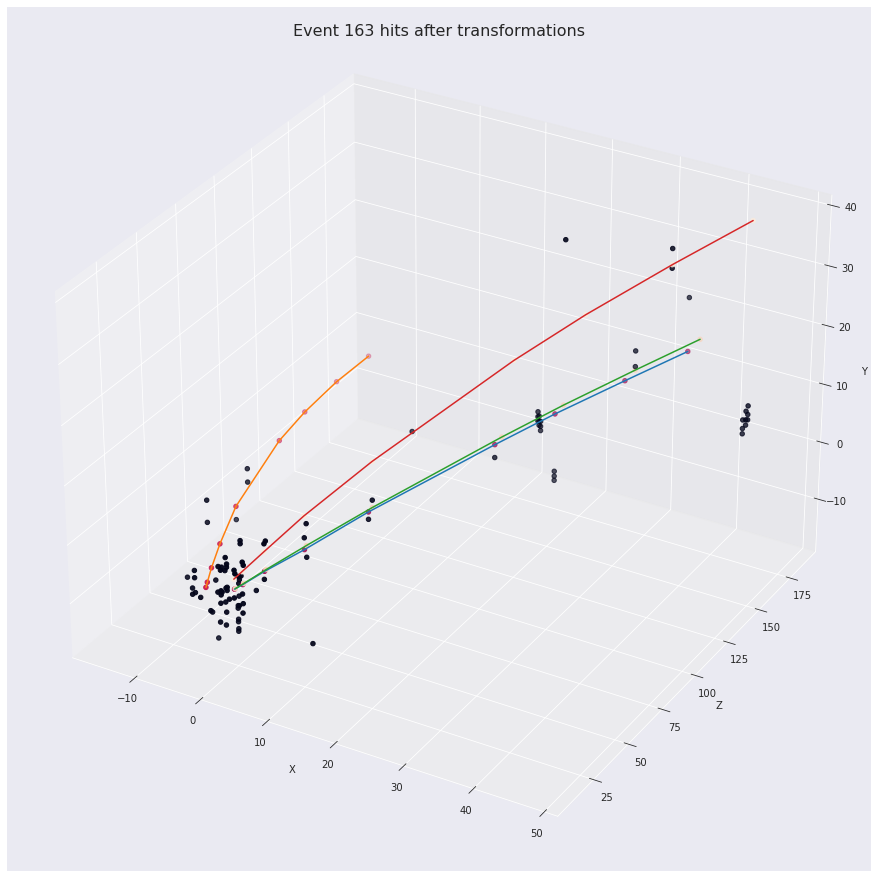

In [17]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig) # Method 1
ax.scatter(transformed.x, transformed.z, transformed.y, c=transformed['track'])
for j, track in transformed[transformed['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits after transformations', size=16)
plt.show()

In [19]:
from ariadne.utils.model import get_checkpoint_path, weights_update
from ariadne.tracknet_v2.model import TrackNETv2
from ariadne.tracknet_v2_1.model import TrackNetClassifier

In [20]:
tracknet_input_features=3
tracknet_conv_features=32
DEVICE='cpu'

In [28]:
import torch

tracknet_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNETv2', 
                           'version': 'version_41', 'checkpoint': 'latest'}
classifier_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNetClassifier', 
                             'version': 'version_108', 'checkpoint': 'latest'}

In [29]:
path_to_tracknet_ckpt = get_checkpoint_path(**tracknet_ckpt_path_dict)
path_to_classifier_ckpt = get_checkpoint_path(**classifier_ckpt_path_dict)

model = weights_update(model=TrackNETv2(input_features=tracknet_input_features,
                                        conv_features=tracknet_conv_features,
                                        rnn_type='gru',
                                        batch_first=True),
                       checkpoint=torch.load(path_to_tracknet_ckpt, map_location=torch.device(DEVICE)))
model.eval()

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(32, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [30]:
model.to(DEVICE)

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(32, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [31]:
from ariadne.utils.data import load_data
from ariadne.utils.base import store_in_index,search_in_index
from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df


from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical, DropSpinningTracks, DropShort

In [32]:
from ariadne.utils.base import *
from ariadne.utils.inference import *

In [33]:
import itertools

def get_seeds(hits, columns=['x','y','z']):
    temp1 = hits[hits.station == 0]
    st0_hits = hits[hits.station == 0][columns].values
    temp2 = hits[hits.station == 1]
    st1_hits = hits[hits.station == 1][columns].values
    # all possible combinations
    idx0 = range(len(st0_hits))
    idx1 = range(len(st1_hits))
    idx_comb = itertools.product(idx0, idx1)
    # unpack indices
    idx0, idx1 = zip(*idx_comb)
    idx0 = list(idx0)
    idx1 = list(idx1)
    # create seeds array
    seeds = np.zeros((len(idx0), 2, 3))
    seeds[:, 0, ] = st0_hits[idx0]
    seeds[:, 1, ] = st1_hits[idx1]
    return seeds

In [34]:
_columns=('x', 'y', 'z')   

In [35]:
def filter_hits_in_ellipses(ellipses, nearest_hits, hits_index, z_last=True, filter_station=True, find_n=10):
    """Function to get hits, which are in given ellipse.
    Space is 3-dimentional, so either first component of ellipce must be z-coordinate or third.
    Ellipse semiaxises must include x- and y-axis.
    Arguments:
        ellipse (np.array of size 5): predicted index with z-component like
                                      (x,y,z, x-semiaxis, y_semiaxis) or (z, x,y, x-semiaxis, y_semiaxis)
        nearest_hits (np.array of shape (n_hits, 3) or only 3): some hits in 3-dim space
        z_last (bool): If True, first component of vector is interpreted as z, if other, third.
        filter_station (bool): if True, only hits with same z-coordinate are considered, else all hits
    Returns:
        numpy.ndarry with filtered hits, all of them in given ellipse, sorted by increasing of distance
    """
    assert nearest_hits.shape[-1] == 3, "index is 3-dimentional, please add z-coordinate to centers"
    if nearest_hits.ndim < 2:
        nearest_hits = np.expand_dims(nearest_hits, 0)
    if nearest_hits.ndim < 3:
        nearest_hits = np.expand_dims(nearest_hits, 0)
    assert ellipses.shape[-1] == 5, "index is 3-dimentional, you need to provide z-coordinate (z_c, x_c, y_c, x_r, y_r) or (x_c, y_c, z_c, x_r, y_r)"
    #ellipses = np.expand_dims(ellipses, -1)
    #find_n = len(nearest_hits)
    ellipses = np.expand_dims(ellipses, 2)
    #found_hits = nearest_hits.reshape(-1, find_n, nearest_hits.shape[-1])
    if z_last:
        x_part = (ellipses[:,0].repeat(find_n,1) - nearest_hits[:, :, 0]) / ellipses[:, 3].repeat(find_n,1)
        #print(x_part**2)
        y_part = (ellipses[:,1].repeat(find_n,1) - nearest_hits[:, :, 1]) / ellipses[:, 4].repeat(find_n,1)
        #print(y_part**2)
    else:
        x_part = (nearest_hits[:, :, 1] - ellipses[:, 1].repeat(find_n, 1)) / ellipses[:, -2].repeat(find_n, 1)
        y_part = (nearest_hits[:, :, 2] - ellipses[:, 2].repeat(find_n, 1)) / ellipses[:, -1].repeat(find_n, 1)
    left_side = x_part**2 + y_part**2
    is_in_ellipse = left_side <= 1
    is_in_ellipse *= hits_index != -1
    return nearest_hits, is_in_ellipse

In [36]:
NUM_COMPONENTS = 2
SUFX = ['_p', '_c']
COLS = ['x', 'y', 'z']

def build_index(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return store_in_index(cont, num_components = 3)

def build_hits(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return cont

def search(points, index):
    cont = np.ascontiguousarray(points[COLS].values)
    return search_in_index(cont, index, 10, n_dim=3)

def to_cart(df):
    graph=to_pandas_graph_from_df(df,SUFX, save_index=False)
    seeds = graph[(graph.station_p == 0) & (graph.station_c == 1)]
    target = df[df.station == 2]
    return seeds, target

def seeds_to_input(seeds_df):
    return seeds_df[['x_p', 'y_p', 'z_p', 'x_c', 'y_c', 'z_c']].values.reshape((-1, 2, 3))

def process_one_event(event_df):
    event_df.loc[event_df["det"] == 1, 'station'] = event_df.loc[event_df["det"] == 1, 'station'].values + 3
    event_df = event_df[['event','x','y','z','station','track']]
    try:
        event_df = transformer(event_df)
    except AssertionError as err:
        print("ASS error %r" % err)
        return None
    event_df.rename(columns={'index': 'index_old'}, inplace=True)
    preds, labels, ellipses = go_over_stations(event_df, max_n_stations=9)
    return preds, ellipses, labels, event_df
    #return seeds, target

In [37]:
temp  = one_event[['x','y','z']][:10]

In [38]:
index = build_index(temp)

In [39]:
search

<function __main__.search(points, index)>

In [40]:
def get_data_for_empty_ellipses(x, preds, grus, mask):
    empty_ellipses_mask = (mask.sum(axis=-1) == 0) # if nothing is found in ellipse
    empty_ellipses = preds[empty_ellipses_mask]#.detach().cpu().numpy()
    full_ellipses = preds[~empty_ellipses_mask]
    empty_xs = x[empty_ellipses_mask]
    empty_grus = grus[empty_ellipses_mask]#.detach().cpu().numpy()
    return empty_xs, empty_ellipses, empty_grus, full_ellipses

In [41]:
import gin

In [42]:
gin.enter_interactive_mode()

In [43]:
def get_tracks(df, min_len=4):
    tracks = df[df['track'] != -1].groupby('track')
    multiplicity = tracks.ngroups
    tracks_vs_len = {3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
    all_tracks = []
    for i, track in tracks:
        temp_track = track[['x', 'y', 'z']].values
        if len(temp_track) >= min_len:
            tracks_vs_len[len(temp_track)].append(temp_track)
            all_tracks.append(temp_track)
    for stations_in_track, this_track_list in tracks_vs_len.items():
        if len(this_track_list) > 0:
            tracks_vs_len[stations_in_track] = np.stack(this_track_list, 0)
    return tracks_vs_len, all_tracks, multiplicity

In [44]:
def get_labels(gt_tracks, predicted_tracks, use_torch=False, device='cuda'):
    if use_torch:
        labels_for_ellipses = torch.zeros(len(predicted_tracks), dtype=torch.bool, device=device)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = gt_tracks.unsqueeze(0).repeat((len(predicted_tracks), 1, 1, 1))
            expanded_xs = predicted_tracks.unsqueeze(1).repeat((1, expanded_tracks.shape[1], 1,1))
            labels_for_ellipses += torch.any(torch.all(torch.all(torch.isclose(expanded_tracks.float(), expanded_xs.float().to(device), rtol=1e-04 ), dim=-1), dim=-1),
                                             dim=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
        labels_for_ellipses_numpy = labels_for_ellipses.detach().cpu().numpy()
        del labels_for_ellipses
        return labels_for_ellipses_numpy
    else:
        labels_for_ellipses = np.zeros(len(predicted_tracks), dtype=bool)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = np.expand_dims(gt_tracks, 0).repeat(len(predicted_tracks), 0)
            expanded_xs = np.expand_dims(predicted_tracks, 1).repeat(expanded_tracks.shape[1], 1)
            labels_for_ellipses += np.any(
                np.all(np.all(np.equal(expanded_tracks, expanded_xs), axis=-1),
                       axis=-1), axis=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
    return labels_for_ellipses


In [45]:
def prolong(x, gru, nearest_hits_mask, nearest_hits, stations_gone, use_torch=False):
    if use_torch:
        xs_for_prolong = x.unsqueeze(1).repeat((1, nearest_hits_mask.shape[-1], 1,1))
        grus_for_prolong = gru.unsqueeze(1)
        grus_for_prolong = grus_for_prolong.repeat((1, nearest_hits_mask.shape[-1], 1))
        prolonged_xs = torch.zeros((len(xs_for_prolong),
                                    nearest_hits_mask.shape[-1],
                                    xs_for_prolong.shape[-2] + 1,
                                    xs_for_prolong.shape[-1]))
        prolonged_xs[:, :, :xs_for_prolong.shape[-2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[-2], :] = nearest_hits
        print(prolonged_xs.shape)
        prolonged_xs = prolonged_xs.reshape(-1, stations_gone + 1, 3)
        nearest_hits_mask = nearest_hits_mask.reshape(-1)
        prolonged_xs = prolonged_xs[nearest_hits_mask]
        prolonged_grus = grus_for_prolong.reshape(-1, grus_for_prolong.shape[-1])
        prolonged_grus = prolonged_grus[nearest_hits_mask]
    else:
        xs_for_prolong = np.expand_dims(x, 1).repeat(nearest_hits_mask.shape[-1], 1)
        grus_for_prolong = np.expand_dims(gru.detach().cpu().numpy(), 1).repeat(nearest_hits_mask.shape[-1], 1)
        prolonged_xs = np.zeros(
            (len(xs_for_prolong), nearest_hits_mask.shape[-1], xs_for_prolong.shape[2] + 1, 3))

        prolonged_xs[:, :, :xs_for_prolong.shape[2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[2], :] = nearest_hits
        prolonged_xs = prolonged_xs[nearest_hits_mask].reshape(-1, stations_gone + 1, 3)
        prolonged_grus = grus_for_prolong[nearest_hits_mask].reshape(-1,
                                                                     grus_for_prolong.shape[-2],
                                                                     grus_for_prolong.shape[-1])
    return prolonged_xs, prolonged_grus

In [46]:
def get_labels_faiss(gt_tracks, predicted_tracks, index):
    labels_for_ellipses = np.zeros(len(predicted_tracks))
    assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
    if len(gt_tracks) > 0:
        tracks_len = gt_tracks.shape[-2]
        gt_tracks = gt_tracks.reshape(-1, gt_tracks.shape[-1])
        predicted_tracks = predicted_tracks.reshape(-1, gt_tracks.shape[-1])
        gt_index = search_in_index(gt_tracks, index, 1, n_dim=3).flatten().reshape(-1, tracks_len)
        predicted_index = search_in_index(predicted_tracks, index, 1, n_dim=3).flatten().reshape(-1, tracks_len)
        expanded_gt = np.expand_dims(gt_index, 0).repeat(len(predicted_index), 0)
        expanded_preds = np.expand_dims(predicted_index, 1).repeat(expanded_gt.shape[1], 1)
        labels_for_ellipses += np.any(np.all(np.equal(expanded_gt, expanded_preds), axis=-1),axis=-1)
        assert len(labels_for_ellipses) == len(expanded_preds), 'length of labels and xs is different!'
    return labels_for_ellipses

In [47]:
temp_x = torch.ones((2, 5, 3))
temp_x[1]*=2
temp_x[:,1:]*=2
temp_x[:,2:]*=3
temp_x[:,3:]*=3
temp_x[:,4:]*=3
temp_x[:,:, 2:]*=2
temp_x[:,:, 1:]*=2
temp_preds = torch.ones((5, 5, 3))
temp_preds[1:]*=2
temp_preds[2:]*=3
temp_preds[:,1:]*=2
temp_preds[:,2:]*=3
temp_preds[:,3:]*=3
temp_preds[:,4:]*=3
temp_preds[:,:, 2:]*=2
temp_preds[:,:, 1:]*=2

In [ ]:
temp_preds[0] - temp_x[0]

In [39]:
temp_index = store_in_index(temp_preds.unique(dim=-1).detach().cpu().numpy().reshape(-1,3), num_components = 3)

NameError: name 'temp_preds' is not defined

In [ ]:
get_labels_faiss(temp_x.detach().cpu().numpy(), temp_preds.detach().cpu().numpy(), index=temp_index)

In [48]:
def get_candidates(preds, targets, grus, ellipses, index, labels,  labels_for_batch, gru_candidates, track_candidates, candidate_ellipses):
    orig_ellipses = torch.zeros((len(ellipses), 4))
    orig_ellipses[:, :2] = ellipses[:, :2]
    orig_ellipses[:, 2:] = ellipses[:, 3:]
    labels_for_ellipses = get_labels_faiss(targets,
                                     preds.detach().cpu().numpy(), index=index)
    labels_for_batch.append(labels_for_ellipses)
    gru_candidates.extend(grus)  # because we need gru for predicted ellipse
    labels.extend(labels_for_ellipses)
    track_candidates.extend(preds)
    candidate_ellipses.extend(orig_ellipses)
    return labels, labels_for_batch, gru_candidates, track_candidates, candidate_ellipses

In [49]:
def get_seeds_only_real(df, columns=['x','y','z']):
    real = df[df['track']!=-1]
    temp1 = real[real.station == 0]
    st0_hits = temp1[columns].values
    temp2 = real[real.station == 1]
    st1_hits = temp2[columns].values
    # all possible combinations
    seeds = np.zeros((len(temp1), 2, 3))
    seeds[:, 0, ] = st0_hits
    seeds[:, 1, ] = st1_hits
    return seeds

In [50]:
def get_seeds_only_real_one_hit(df, columns=['x','y','z']):
    real = df[df['track']!=-1]
    temp1 = real[real.station == 0]
    st0_hits = temp1[columns].values
    #temp2 = real[real.station == 1]
    #st1_hits = temp2[columns].values
    # all possible combinations
    seeds = np.zeros((len(temp1), 1, 3))
    seeds[:, 0, ] = st0_hits
    #seeds[:, 1, ] = st1_hits
    print('seeds:', seeds)
    return seeds

In [51]:
def go_over_stations(df, max_n_stations=9):
    max_batch_size = 256
    all_hits_index = build_index(df)
    tracks_vs_len, all_tracks, multiplicity = get_tracks(df)
    print(tracks_vs_len)
    #seeds, target = to_cart(df)
    chunk_data_x = get_seeds_only_real(df)
    #print(chunk_data_x)
    #chunk_data_x = np.expand_dims(chunk_data_x, 1)
    #index = build_index(target)
    # search(target[:2], index)
    #chunk_data_x = seeds_to_input(seeds)
    chunk_data_len = torch.tensor(np.full(len(chunk_data_x), 2), dtype=torch.int64).to(DEVICE)
    gru_candidates = []
    x_candidates = []
    candidate_labels = []
    candidate_ellipses = []
    for stations_gone in range(2, max_n_stations):
        print(f'===> {stations_gone}')
        num_batches = int(len(chunk_data_x) / max_batch_size) + 1
        print(num_batches)
        num_right_batches = 0
        num_all_batches = 0
        next_stage_xs = []
        next_stage_lens = []
        if len(chunk_data_x) == 0:
            print('Have zero ellipces on this station! Skipping other stations')
            print(candidate_ellipses)
            print(x_candidates)
            print(candidate_labels)
            return x_candidates, candidate_labels, candidate_ellipses
        labels_for_empty_el_batch = []
        labels_for_full_el_batch = []
        station_df = df[df['station']==stations_gone]
        current_index = build_index(station_df)
        this_station_hits = build_hits(station_df)
        for batch_num in range(num_batches):
            min_i = max_batch_size*batch_num
            max_i = min(max_batch_size + min_i, len(chunk_data_x))
            if min_i==max_i:
                print('Have zero ellipces on this station! Skipping other stations')
                print(candidate_ellipses)
                print(x_candidates)
                print(candidate_labels)
                return x_candidates, candidate_labels, candidate_ellipses
            
            this_batch_x = torch.tensor(chunk_data_x[min_i: max_i]).to(DEVICE)
            this_batch_len = chunk_data_len[min_i: max_i]
            print(this_batch_x)
            batch_prediction, batch_gru = model(this_batch_x,
                                                     torch.tensor(this_batch_len, dtype=torch.int64).to(DEVICE),
                                                     return_gru_states=True)
            new_pred = torch.full((len(batch_prediction), 5), z_values[stations_gone], device=DEVICE)
            new_pred[:, :2] = batch_prediction[:, -1, :2]
            new_pred[:, 3:] = batch_prediction[:, -1, 2:]
            batch_prediction = new_pred
            batch_gru = batch_gru[:, -1]
            if batch_num == 0:
                print(f'station {stations_gone+1}, on this station: {len(this_station_hits)} hits' )
            if len(this_station_hits) == 0:
                LOGGER.info('Have zero hits on this station! Skipping other stations')
                print(candidate_ellipses)
                print(x_candidates)
                print(candidate_labels)
                return x_candidates, candidate_labels, candidate_ellipses
            prediction_numpy = batch_prediction.detach().cpu().numpy()
            nearest_hits_index = search_in_index(prediction_numpy[:, :3],
                                                 current_index, 
                                                 30,
                                                 n_dim=3)
            nearest_hits = this_station_hits[nearest_hits_index]
            nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                               nearest_hits,
                                                               nearest_hits_index,
                                                               filter_station=False,
                                                               z_last=True,
                                                               find_n=nearest_hits_index.shape[1])
            nearest_hits = torch.from_numpy(nearest_hits)
            nearest_hits_mask = in_ellipse_mask 
            # here empty ellipses and all inputs for them are saved
            empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_empty_ellipses(this_batch_x, 
                                                                               batch_prediction, 
                                                                               batch_gru, 
                                                                               nearest_hits_mask)
            prolonged_batch_xs, prolonged_grus = prolong(this_batch_x,
                                                         batch_gru,
                                                         nearest_hits_mask,
                                                         nearest_hits,
                                                         stations_gone,
                                                         use_torch=True)
            next_stage_xs.append(prolonged_batch_xs)
            next_stage_lens.append(np.full(len(prolonged_batch_xs), stations_gone + 1))
            if stations_gone > 3:
                use_empty_ellipses = []
                empty_ellipses_station_intersections = []
                use_empty_ellipses = torch.ones(len(empty_ellipses), dtype=torch.bool)
                empty_xs = empty_xs[use_empty_ellipses]
                empty_grus = empty_grus[use_empty_ellipses]
                if len(empty_xs) > 0:
                    (candidate_labels, 
                     labels_for_empty_el_batch, 
                     gru_candidates, 
                     x_candidates,
                     candidate_ellipses) =  get_candidates(empty_xs, 
                                                     tracks_vs_len[stations_gone],
                                                     prolonged_grus[:, -2], 
                                                     empty_ellipses,
                                                     all_hits_index,
                                                     candidate_labels, 
                                                     labels_for_full_el_batch, 
                                                     gru_candidates, 
                                                     x_candidates,
                                                     candidate_ellipses)
                    print(candidate_ellipses)
            if (stations_gone == (max_n_stations-1)): # if we are predicting for last station
                if len(prolonged_batch_xs) > 0:  # now we prolong candidates with all hits *in* ellipses
                    (candidate_labels,
                     labels_for_full_el_batch, 
                     gru_candidates, 
                     x_candidates,
                     candidate_ellipses) =  get_candidates(prolonged_batch_xs, 
                                                     tracks_vs_len[stations_gone + 1],
                                                     prolonged_grus[:, -1], 
                                                     predicted_ellipses,
                                                     all_hits_index,
                                                     candidate_labels, 
                                                     labels_for_full_el_batch, 
                                                     gru_candidates, 
                                                     x_candidates,
                                                     candidate_ellipses)
                    
        if len(next_stage_xs) > 1:
            chunk_data_x = np.concatenate(next_stage_xs, 0)
            chunk_data_len = np.concatenate(next_stage_lens, 0)
        else:
            try:
                chunk_data_x = next_stage_xs[0]
                chunk_data_len = next_stage_lens[0]
            except:
                continue
    return x_candidates, candidate_labels, candidate_ellipses

In [52]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz,index
1002,1,2.771679,0.281289,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002
1003,1,2.771679,-2.228503,11.979,0,0,31,0.601710,0.387549,3.884144,0.770924,-3.540086,-1.151055,1003
1004,1,2.656870,0.836981,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1004
1005,1,2.656870,-2.348267,11.979,0,0,13,0.569849,0.333992,3.905233,0.770924,-3.540086,-1.151055,1005
1006,1,2.590705,-0.678447,11.979,0,0,33,0.238252,0.358872,1.656099,0.770924,-3.540086,-1.151055,1006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1,43.032370,37.206800,183.818,1,8,33,0.531020,0.360114,1.585667,0.770924,-3.540086,-1.151055,1131
1132,1,35.942770,15.108370,183.818,1,8,31,0.892348,0.389288,3.827012,0.770924,-3.540086,-1.151055,1132
1133,1,34.186610,21.662460,183.818,1,8,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1133
1134,1,34.186610,12.473200,183.818,1,8,13,0.860409,0.336489,3.850817,0.770924,-3.540086,-1.151055,1134


In [99]:
one_event = df[df.event == 0]
preds, ellipses, labels, event_df = process_one_event(one_event)

{3: [], 4: array([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        [ 4.370823, -4.813928, 24.499   ],
        [ 7.519342, -5.553101, 39.702   ]],

       [[-3.494453, -4.224186, 12.344   ],
        [-4.188253, -4.386579, 15.614   ],
        [-5.446515, -4.759852, 24.499   ],
        [-6.373987, -5.417351, 39.702   ]]]), 5: array([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        [ 0.946032 , -0.172354 , 24.499    ],
        [ 4.301402 ,  6.456415 , 39.702    ],
        [16.00282  ,  0.2570905, 64.535    ]]]), 6: array([[[  2.658756 ,   0.6553643,  12.344    ],
        [  3.343926 ,   1.700543 ,  15.614    ],
        [  5.303983 ,   4.357539 ,  24.499    ],
        [ 10.3557   ,   9.522198 ,  39.702    ],
        [ 21.53152  ,  18.76442  ,  64.535    ],
        [ 58.00927  ,  38.52792  , 112.649    ]]]), 7: array([[[  4.128531 ,  -1.885697 ,  12.344    ],
        [  5.05668  ,  -1.466706 ,  15.614    ],
   

In [159]:
preds

[tensor([[  4.1695,  -1.8467,  12.3440],
         [  5.1117,  -1.4126,  15.6140],
         [  4.5151,   0.6832,  24.4990],
         [ -7.1791,   4.7797,  39.7020],
         [-58.1587,  22.3961,  64.5350]]),
 tensor([[  4.1695,  -1.8467,  12.3440],
         [  5.1117,  -1.4126,  15.6140],
         [  4.5151,   0.6832,  24.4990],
         [ -7.1791,   4.7797,  39.7020],
         [-58.3696,  21.6092,  64.5350]]),
 tensor([[  4.1695,  -1.8467,  12.3440],
         [  5.1117,  -1.4126,  15.6140],
         [  4.5151,   0.6832,  24.4990],
         [ -9.6287,   5.0625,  39.7020],
         [-58.1587,  23.2800,  64.5350]]),
 tensor([[  4.1695,  -1.8467,  12.3440],
         [  5.1117,  -1.4126,  15.6140],
         [  4.5151,   0.6832,  24.4990],
         [ -9.6287,   5.0625,  39.7020],
         [-58.1587,  22.3961,  64.5350]]),
 tensor([[  4.1695,  -1.8467,  12.3440],
         [  5.1117,  -1.4126,  15.6140],
         [  4.5151,   0.6832,  24.4990],
         [ -9.6287,   5.0625,  39.7020],
        

In [47]:
!ls ../output/cgem_t_tracknet_new_gov_test_2

logs_TrackNetProcessorWithMask	masked_tracknet_bes.npy


In [48]:
temp = np.load('../output/cgem_t_tracknet_new_gov_test/masked_tracknet_bes.npy', allow_pickle=True)

In [62]:
temp[-1]

array([[0.048322148760330474, -0.9642528092546823, -0.31015889113393136],
       [0.07071860684769771, 0.05873537427718101, -0.305832048491416],
       [0.08795815820543096, 0.9897696386409565, -0.301043673090283]],
      dtype=object)

In [165]:
!ls ../output/cgem_t_tracknet_2_1_gov_test_2

logs_TrackNetV21ProcessorWithModel  tracknet_with_model_205_train.npz
tracknet_with_model_200_train.npz   tracknet_with_model_205_valid.npz
tracknet_with_model_200_valid.npz   tracknet_with_model_206_train.npz
tracknet_with_model_201_train.npz   tracknet_with_model_206_valid.npz
tracknet_with_model_201_valid.npz   tracknet_with_model_207_train.npz
tracknet_with_model_202_train.npz   tracknet_with_model_207_valid.npz
tracknet_with_model_202_valid.npz   tracknet_with_model_208_train.npz
tracknet_with_model_203_train.npz   tracknet_with_model_208_valid.npz
tracknet_with_model_203_valid.npz   tracknet_with_model_209_train.npz
tracknet_with_model_204_train.npz   tracknet_with_model_209_valid.npz
tracknet_with_model_204_valid.npz


In [44]:
temp1 = np.load('../output/cgem_t_tracknet_2_1_gov_test_2/tracknet_with_model_200_valid.npz', allow_pickle=True)

In [45]:
temp1.files

['grus', 'preds', 'labels', 'events']

In [46]:
print(temp1['grus'][0])
print(temp1['preds'][0])
print(temp1['labels'][0])
print(temp1['events'][0])

[ 0.57744676  0.321242    0.42208973 -0.0983246   0.9014333   0.38024405
  0.6006496  -0.29209587  0.23973331 -0.01959872 -0.8512708   0.5327286
 -0.6978472   0.03326076  0.08680279  0.6573094  -0.36983407  0.51714826
 -0.13901328 -0.00808987  0.12296107 -0.7449811  -0.532845   -0.56155926
 -0.03939315 -0.00156602 -0.4580859   0.08412484 -0.69972223 -0.8214024
  0.7454186  -0.11139695]
[-0.82165384  0.82897446]
False
0


In [178]:
print(temp1['labels'].sum()/len(temp1['labels']))

0.003180558042132561


In [ ]:
preds

In [174]:
sum(labels)

0.0

In [175]:
event_df[event_df.track !=-1].groupby('track').ngroups

15

In [176]:
one_event[one_event.track !=-1]

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz
1,0,5.757049,-3.692584,11.979,0,0,18,0.432272,-0.022226,1.057785,0.556528,-3.442007,-0.975065
2,0,5.697944,-4.441849,11.979,0,0,190,0.320170,-0.066770,0.830373,0.556528,-3.442007,-0.975065
4,0,4.169508,-1.846688,11.979,0,0,29,0.449598,0.196688,1.571362,0.556528,-3.442007,-0.975065
5,0,4.128531,-1.885697,11.979,0,0,132,0.415257,0.180195,1.470553,0.556528,-3.442007,-0.975065
7,0,2.658756,0.655364,11.979,0,0,228,0.063607,0.104897,0.326012,0.556528,-3.442007,-0.975065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,-48.198130,-2.854925,183.818,1,8,230,-0.543470,0.011242,2.703192,0.556528,-3.442007,-0.975065
974,0,-60.671800,-4.214130,183.818,1,8,74,-0.351619,-0.001768,1.579826,0.556528,-3.442007,-0.975065
993,0,-16.731620,4.473713,183.818,1,8,405,0.014186,0.003188,0.013173,-28.514688,-7.998400,136.075989
1000,0,-21.260160,-1.124982,183.818,1,8,45,-0.042387,0.023902,1.738221,0.556528,-3.442007,-0.975065


In [177]:
len(labels)

150

In [178]:
station_df = event_df[event_df['station']==4]
current_index = build_index(station_df)
this_station_hits = build_hits(station_df)

In [179]:
x = torch.tensor([ [[ 2.614070e+00, -1.295032e+00,  1.234400e+01],
        [ 3.145072e+00, -7.262638e-01,  1.561400e+01],
        [ 4.515133e+00,  6.832460e-01,  2.449900e+01],
        [7.5193,  2.3896, 39.7020]
]])

In [221]:
x = torch.tensor([[[ 3.6178, -5.2168, 12.3440],
        [ 4.0739, -5.3079, 15.6140],
       # [ 5.9377, -5.7952, 24.4990]
                  ]])

In [212]:
x = torch.tensor([[[  1.0495,  -2.6926,  12.3440],
        [  1.1641,  -2.3398,  15.6140],
        [  1.4731,  -1.6918,  24.4990],
        [  2.1565,  -0.4850,  39.7020],
        #[  3.4298,   1.5144,  64.5350],
        #[  6.5803,   5.2351, 112.6490],
        #[  8.3427,   6.9603, 135.3300],
        #[ 10.7015,   8.9311, 160.6635]
                  ]])

In [205]:
x = torch.tensor([[[ 4.169508e+00, -1.846688e+00,  1.234400e+01],
        [ 5.111703e+00, -1.412612e+00,  1.561400e+01],
       # [ 8.031296e+00, -1.935176e-01,  2.449900e+01],
        #[ 1.252183e+01,  1.828757e+00,  3.970200e+01],
        #[ 2.105442e+01,  4.887043e+00,  6.453500e+01],
       # [ 3.932907e+01,  1.144473e+01,  1.126490e+02],
      #  [ 4.861426e+01,  1.443108e+01,  1.353300e+02],
      #  [ 6.059212e+01,  1.719165e+01,  1.606635e+02],
       # [ 7.169544e+01,  2.021706e+01,  1.836680e+02]
                  ]])

In [183]:
x = torch.tensor([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        #[ 4.370823, -4.813928, 24.499   ],
        #[ 7.519342, -5.553101, 39.702   ]
                  ]])

In [196]:
x = torch.tensor([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        #[ 0.946032 , -0.172354 , 24.499    ],
        #[ 4.301402 ,  6.456415 , 39.702    ],
        #[16.00282  ,  0.2570905, 64.535    ]
                  ]])

In [197]:
z_values

{0: 12.344,
 1: 15.614,
 2: 24.499,
 3: 39.702,
 4: 64.535,
 5: 112.649,
 6: 135.33,
 7: 160.6635,
 8: 183.668}

In [213]:
el, gru = model(x, input_lengths=torch.tensor(((x.shape[-2])), dtype=torch.int64).unsqueeze(0), return_gru_states=True)

In [214]:
el

tensor([[[ 1.1693, -2.3332,  0.8330,  0.4939],
         [ 1.5188, -1.6760,  1.0453,  0.4575],
         [ 2.2129, -0.4785,  1.1529,  0.5191],
         [ 3.7281,  1.3773,  3.1076,  1.0675]]], grad_fn=<CatBackward>)

In [215]:
ellipse = el[:, -1]#torch.tensor([[2.8653, -0.4686, 39.7020, 3.6401,  1.2615]])


In [201]:
prediction_numpy = ellipse.detach().cpu().numpy()
nearest_hits_index = search_in_index(prediction_numpy[:, :3],
                                     current_index, 
                                     10,
                                     n_dim=3)

NameError: name 'current_index' is not defined

In [184]:
nearest_hits_index

array([[ 5, 52,  6, 51,  4,  3, 49,  1,  2, 46]])

In [185]:
nearest_hits = this_station_hits[nearest_hits_index]

In [186]:
nearest_hits

array([[[20.84541  ,  4.708181 , 64.535    ],
        [21.05442  ,  5.488245 , 64.535    ],
        [21.05442  ,  4.887043 , 64.535    ],
        [20.84541  ,  4.106979 , 64.535    ],
        [16.00282  ,  0.2570905, 64.535    ],
        [11.76423  ,  7.682032 , 64.535    ],
        [ 8.297853 ,  5.59443  , 64.535    ],
        [ 7.381797 ,  2.175659 , 64.535    ],
        [ 8.297853 ,  0.1378237, 64.535    ],
        [ 4.506203 ,  5.187184 , 64.535    ]]])

In [129]:
ellipse

tensor([[39.8278, 10.9620,  2.9961,  1.1181]], grad_fn=<SelectBackward>)

In [224]:
target = [5.9377, -5.7952]

In [225]:
((ellipse[:,0] - target[0])/ellipse[:,-2])**2,((ellipse[:,1]-target[1])/ellipse[:, -1])**2, 

(tensor([0.5056], grad_fn=<PowBackward0>),
 tensor([45.1458], grad_fn=<PowBackward0>))

In [226]:
torch.sqrt(((ellipse[:,0] - target[0])/ellipse[:,-2])**2+((ellipse[:,1]-target[1])/ellipse[:, -1])**2)

tensor([6.7566], grad_fn=<SqrtBackward>)

In [168]:
nearest_hits

array([[[11.76423  ,  7.682032 , 64.535    ],
        [16.00282  ,  0.2570905, 64.535    ],
        [ 8.297853 ,  5.59443  , 64.535    ],
        [20.84541  ,  4.708181 , 64.535    ],
        [20.84541  ,  4.106979 , 64.535    ],
        [21.05442  ,  5.488245 , 64.535    ],
        [21.05442  ,  4.887043 , 64.535    ],
        [ 7.381797 ,  2.175659 , 64.535    ],
        [ 8.297853 ,  0.1378237, 64.535    ],
        [ 4.506203 ,  5.187184 , 64.535    ]]])

In [122]:
nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                        nearest_hits,
                                                        nearest_hits_index,
                                                        filter_station=False,
                                                        z_last=True,
                                                        find_n=nearest_hits_index.shape[1])

In [123]:
nearest_hits = torch.from_numpy(nearest_hits)
nearest_hits_mask = in_ellipse_mask 

In [125]:
nearest_hits_mask

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [124]:
nearest_hits

tensor([[[11.7642,  7.6820, 64.5350],
         [ 8.2979,  5.5944, 64.5350],
         [16.0028,  0.2571, 64.5350],
         [ 7.3818,  2.1757, 64.5350],
         [20.8454,  4.7082, 64.5350],
         [20.8454,  4.1070, 64.5350],
         [21.0544,  5.4882, 64.5350],
         [21.0544,  4.8870, 64.5350],
         [ 8.2979,  0.1378, 64.5350],
         [ 4.5062,  5.1872, 64.5350]]], dtype=torch.float64)

In [99]:
empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_empty_ellipses(x, 
                                                                                       prediction_numpy,
                                                                                       gru, 
                                                                                       nearest_hits_mask)

In [100]:
empty_xs

tensor([], size=(0, 3, 3))

In [103]:
prolonged_batch_xs, prolonged_grus = prolong(x,
                                             gru[:,-1],
                                             nearest_hits_mask,
                                             nearest_hits,
                                             3,
                                             use_torch=True)

torch.Size([1, 10, 4, 3])


In [104]:
prolonged_batch_xs

tensor([[[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.2525,  3.3857, 39.7020]],

        [[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.5193,  2.3896, 39.7020]]])

In [ ]:
nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                        nearest_hits.detach().cpu().numpy(),
                                                        nearest_hits_index,
                                                        filter_station=False,
                                                        z_last=True,
                                                        find_n=nearest_hits_index.shape[1])
nearest_hits = torch.from_numpy(nearest_hits)
nearest_hits_mask = in_ellipse_mask 
            # here empty ellipses and all inputs for them are saved
empty_xs, empty_ellipses, empty_grus, predicted_ellipses = get_data_for_empty_ellipses(x, 
                                                                                       prediction_numpy,
                                                                                       gru, 
                                                                                       nearest_hits_mask)
prolonged_batch_xs, prolonged_grus = prolong(x,
                                             gru[-1],
                                             nearest_hits_mask,
                                             nearest_hits,
                                             stations_gone,
                                             use_torch=True)

In [95]:
prolonged_batch_xs

NameError: name 'prolonged_batch_xs' is not defined

In [68]:
preds

[tensor([[ 4.1695, -1.8467, 12.3440],
         [ 5.1117, -1.4126, 15.6140],
         [ 7.9311, -0.2339, 24.4990],
         [17.0101,  1.7803, 39.7020]]),
 tensor([[ 4.1695, -1.8467, 12.3440],
         [ 5.1117, -1.4126, 15.6140],
         [ 8.0313, -0.1935, 24.4990],
         [17.0101,  1.7803, 39.7020]]),
 tensor([[ 2.6141, -1.2950, 12.3440],
         [ 3.1451, -0.7263, 15.6140],
         [ 4.5151,  0.6832, 24.4990],
         [ 7.5193,  2.3896, 39.7020]]),
 tensor([[ 2.2068, -4.1482, 12.3440],
         [ 2.6801, -4.3014, 15.6140],
         [ 4.3708, -4.8139, 24.4990],
         [ 7.5193, -5.5531, 39.7020]]),
 tensor([[ 1.6009, -2.3990, 12.3440],
         [ 1.8842, -2.0741, 15.6140],
         [-0.2291, -2.4703, 24.4990],
         [-7.1791, -2.4127, 39.7020]]),
 tensor([[ 1.6009, -2.3990, 12.3440],
         [ 1.8842, -2.0741, 15.6140],
         [-0.2291, -2.4703, 24.4990],
         [-7.1791, -3.1524, 39.7020]]),
 tensor([[ 1.5492, -2.7152, 12.3440],
         [ 1.8354, -2.5333, 15.6140],


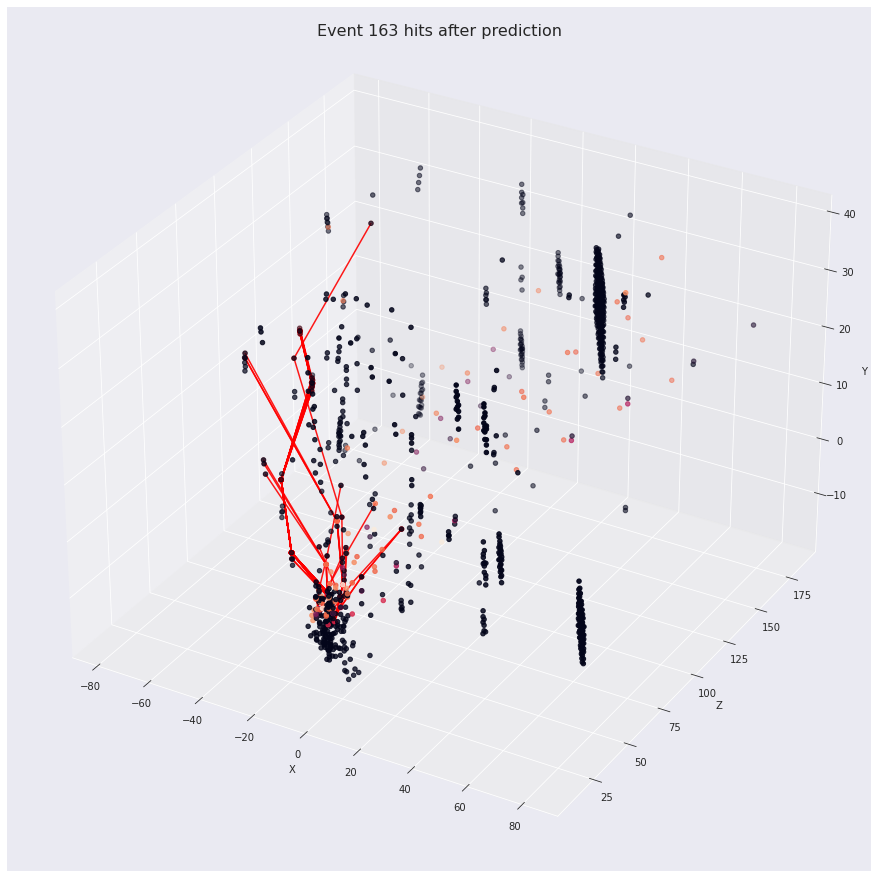

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d.art3d as art3d

def seeds_to_lines(seeds):
    return seeds[['x_p',  'y_c', 'z_p', 'x_c','y_p', 'z_c']].values.reshape((-1, 3, 2))

def draw_track(ax, seed, colors_tracks):
    if not seed.track:
        col = (0.0, 0.0, 0.000, 0.9)
    else:
        col = colors_tracks[seed.track_p]

    val_x = seed[['z_p', 'z_c']].values
    val_y = seed[['x_p', 'x_c']].values
    val_z = seed[['y_p', 'y_c']].values
    
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)
    
def draw_track_from_numpy(ax, track,label):
    if label:
        col = (0., 1.0, 0.000, 0.9)    
    else:
        col = (1, 0.0, 0.000, 0.9)
    val_x = track[:,0]
    val_y = track[:,2]
    val_z = track[:,1]
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)

def visual_predict(df, pred, labels, min_pred_num=0, max_pred_num=10):
    #for p in pred:
    #    print(p)
    #    return
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig) # Method 1
    #for j, track in df[df['track']!=-1].groupby('track'):
    #    ax.plot(track.x, track.z, track.y)
    ax.scatter(df.x, df.z, df.y, c=event_df['track'])
    for i, (track,label) in enumerate(zip(pred,labels)):
        if i >= min_pred_num and i <=max_pred_num:
            draw_track_from_numpy(ax, track, label)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    fig.suptitle(f'Event {num} hits after prediction', size=16)
    plt.show()

visual_predict(event_df, preds, labels, 0, 13000)

In [56]:
def draw_ellipse_on_station(ax, seed, ellipse_tensor, station_to_draw, ellipse_for_fake, col, zorder_):    
    
    ellipse_np = ellipse_tensor
    assert station_to_draw <= ellipse_np.shape[0] and station_to_draw > 0, f"shape={ellipse_np.shape[0]} station_to_draw={station_to_draw}"
    
    ellipse = ellipse_np[station_to_draw - 1]
    z = ellipse[0]
    phi = ellipse[1]
    station = station_to_draw
    if seed.track:
        ax.scatter(station, phi, zs=z, color='r', zorder=zorder_+12, s=5)
    xy = (phi, z)
    w = ellipse[3]
    h = ellipse[2]    
    if ellipse_for_fake or seed.track:
        p = Ellipse(xy, w * 2, h * 2, color=col, fill=False, zorder=zorder_)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=station, zdir="x")

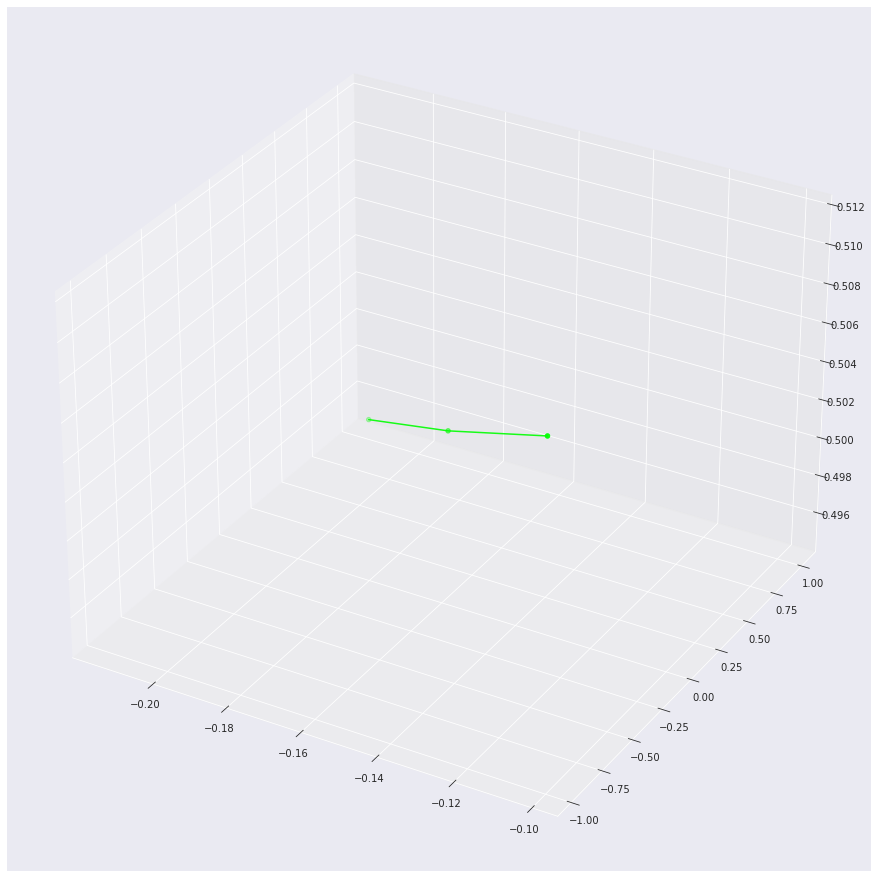

In [62]:
track = np.array([[-0.10170233766233772, 0.5113016132581087, -0.9642529460205991],
       [-0.1601984651711924, 0.5026169124435764, 0.058734816118162],
       [-0.2141454781582054, 0.49507936126065855, 0.9897707288090867]])
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig) # Method 1
draw_track_from_numpy(ax, track, 1)

In [58]:
import numpy as np
hashs = []
temp = np.load('../output/cgem_t_tracknet_bes_3/masked_tracknet_bes.npy', allow_pickle=True)

In [61]:
temp[2]

array([[-0.10170233766233772, 0.5113016132581087, -0.9642529460205991],
       [-0.1601984651711924, 0.5026169124435764, 0.058734816118162],
       [-0.2141454781582054, 0.49507936126065855, 0.9897707288090867]],
      dtype=object)

In [48]:
lens = {4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [49]:
for i, track in enumerate(temp):
    lens[len(track)]+=1
lens

{4: 35862, 5: 54085, 6: 48727, 7: 86866, 8: 78356, 9: 456592}

In [52]:
for i, track in enumerate(temp):
    if i <180000:
        continue
    if i >180010:
        break
    print(track)

[[-4.087064e+00  2.836418e-02  1.234400e+01]
 [-5.260700e+00  1.038007e+00  1.561400e+01]
 [-7.853085e+00  3.303249e+00  2.449900e+01]
 [-1.332592e+01  8.372846e+00  3.970200e+01]
 [-2.069871e+01  1.569843e+01  6.453500e+01]
 [-3.138991e+01  3.036680e+01  1.126490e+02]
 [-3.488570e+01  3.692782e+01  1.353300e+02]]
[[ 2.104243e+00 -7.506521e-01  1.234400e+01]
 [ 2.410336e+00  1.281407e-01  1.561400e+01]
 [ 3.260868e+00  2.381718e+00  2.449900e+01]
 [ 5.226301e+00  6.706666e+00  3.970200e+01]
 [ 9.167198e+00  1.354517e+01  6.453500e+01]
 [ 1.972670e+01  2.662932e+01  1.126490e+02]
 [ 2.601612e+01  3.272962e+01  1.353300e+02]]
[[  2.277548   -0.3577276  12.344    ]
 [  2.460751    0.5919499  15.614    ]
 [  2.957481    2.996795   24.499    ]
 [  4.054578    7.66634    39.702    ]
 [  6.17767    15.06441    64.535    ]
 [ 11.51182    28.95782   112.649    ]
 [ 14.57754    35.43847   135.33     ]]
[[ -1.110275   -0.5433736  12.344    ]
 [ -1.932048    0.5344788  15.614    ]
 [ -4.067745    

In [71]:
import numpy as np
hashs = []
data = np.load('../output/tracknet_bmn/masked_tracknet_bmn_all_stations.npy', allow_pickle=True)
data_lists = {4:[], 5:[], 6:[],7:[], 8:[], 9:[]}
for i, track in enumerate(data):
    if hash(track.tostring()) not in hashs:
        data_lists[len(track)].append(track)
        hashs.append(hash(track.tostring()))
    if i%1000 == 0:
        print(f"==> {i}")
    
result_list = []
for len_data in data_lists.values():
    print(len(len_data))
    result_list.extend(len_data)
print('have result number of tracks:', len(result_list))
os.mkdir('../output/cgem_t_tracknet_bmn_fixed')
np.save('../output/cgem_t_tracknet_bmn_fixed/masked_tracknet_bmn_all_stations', np.array(result_list, dtype=object), allow_pickle=True)


==> 0
==> 1000
==> 2000
==> 3000
==> 4000
==> 5000
==> 6000
==> 7000
==> 8000
==> 9000
==> 10000
==> 11000
==> 12000
==> 13000
==> 14000
==> 15000
==> 16000
==> 17000
==> 18000
==> 19000
==> 20000
==> 21000
==> 22000
==> 23000
==> 24000
==> 25000
==> 26000
==> 27000
==> 28000
==> 29000


KeyboardInterrupt: 